In [1]:
import praw
import datetime as dt
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

sns.set_palette("deep")
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['grid.color'] = '0.8'
mpl.rcParams['figure.figsize'] = '8, 8'
plt.rcParams["font.size"] = 18
plt.rcParams['font.family'] = 'Fira Mono'
plt.rcParams["axes.linewidth"]  = 2

from secret import CLIENT_ID, CLIENT_SECRET, USER_AGENT, USERNAME, PASSWORD

# https://praw.readthedocs.io/en/stable/getting_started/quick_start.html

# Create authorized reddit instance
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT,
    username=USERNAME,
    password=PASSWORD,
)

# Obtain specific submission
submission = reddit.submission(id='2alnzy')

# Loading all comments by making multiple api calls
# to replace all "load more comments" instances (may take a long time)
submission.comment_sort = "old"
submission.comments.replace_more(limit=None) 
all_comments = submission.comments.list()

Version 7.0.0 of praw is outdated. Version 7.4.0 was released Friday July 30, 2021.


In [2]:
# Create two Unix timestamps (number of seconds since 1 Jan 1970)
# Only comments between these two timestamps will be considered
time_start = dt.datetime(2014,7,13,18,45,0,
                              tzinfo=dt.timezone.utc).timestamp()
time_end = dt.datetime(2014,7,13,22,30,0,
                              tzinfo=dt.timezone.utc).timestamp()

comments  = [comment for comment in all_comments 
                        if comment.created_utc >= time_start
                          and comment.created_utc <= time_end]

comments_timestamps = [comment.created_utc for comment in comments]

In [3]:
df = pd.DataFrame({"datetime": pd.to_datetime(comments_timestamps, unit='s')})

In [4]:
min_bin = int(df['datetime'].min().floor('min').timestamp())
max_bin = int(df['datetime'].max().ceil('min').timestamp())

In [5]:
bin_range = list(range(min_bin, max_bin, 60))
x_ticks = list(range(min_bin, max_bin, 900))
minor_locator = AutoMinorLocator(15)

In [10]:
game_start = dt.datetime(2014,7,13,19,0,0, tzinfo=dt.timezone.utc).timestamp()
game_break_start = dt.datetime(2014,7,13,19,47,0, tzinfo=dt.timezone.utc).timestamp()
game_break_end = dt.datetime(2014,7,13,20,4,0, tzinfo=dt.timezone.utc).timestamp()
game_end_90 = dt.datetime(2014,7,13,20,52,0, tzinfo=dt.timezone.utc).timestamp()
extra_time_start = dt.datetime(2014,7,13,20,58,0, tzinfo=dt.timezone.utc).timestamp()
extra_time_break_start = dt.datetime(2014,7,13,21,14,0, tzinfo=dt.timezone.utc).timestamp()
extra_time_break_end = dt.datetime(2014,7,13,21,17,0, tzinfo=dt.timezone.utc).timestamp()
extra_time_end = dt.datetime(2014,7,13,21,36,0, tzinfo=dt.timezone.utc).timestamp()
                    
#goal = dt.datetime(2014,7,13,21,24,0, tzinfo=dt.timezone.utc).timestamp()

In [39]:
# highlights
kramer_collision = dt.datetime(2014,7,13,19,17,0, tzinfo=dt.timezone.utc).timestamp()
higuain_miss = dt.datetime(2014,7,13,19,21,0, tzinfo=dt.timezone.utc).timestamp()
higuain_offside_goal = dt.datetime(2014,7,13,19,30,0, tzinfo=dt.timezone.utc).timestamp()
hoewedes_post = dt.datetime(2014,7,13,19,46,0, tzinfo=dt.timezone.utc).timestamp()
messi_chance = dt.datetime(2014,7,13,20,5,0, tzinfo=dt.timezone.utc).timestamp()
neuer_higuain_collision = dt.datetime(2014,7,13,20,15,0, tzinfo=dt.timezone.utc).timestamp()
palacio_lob_chance = dt.datetime(2014,7,13,21,5,0, tzinfo=dt.timezone.utc).timestamp()
schweinsteiger_bleeding = dt.datetime(2014,7,13,21,21,0, tzinfo=dt.timezone.utc).timestamp()
goetze_goal = dt.datetime(2014,7,13,21,24,0, tzinfo=dt.timezone.utc).timestamp()
champions = dt.datetime(2014,7,13,21,36,0, tzinfo=dt.timezone.utc).timestamp()

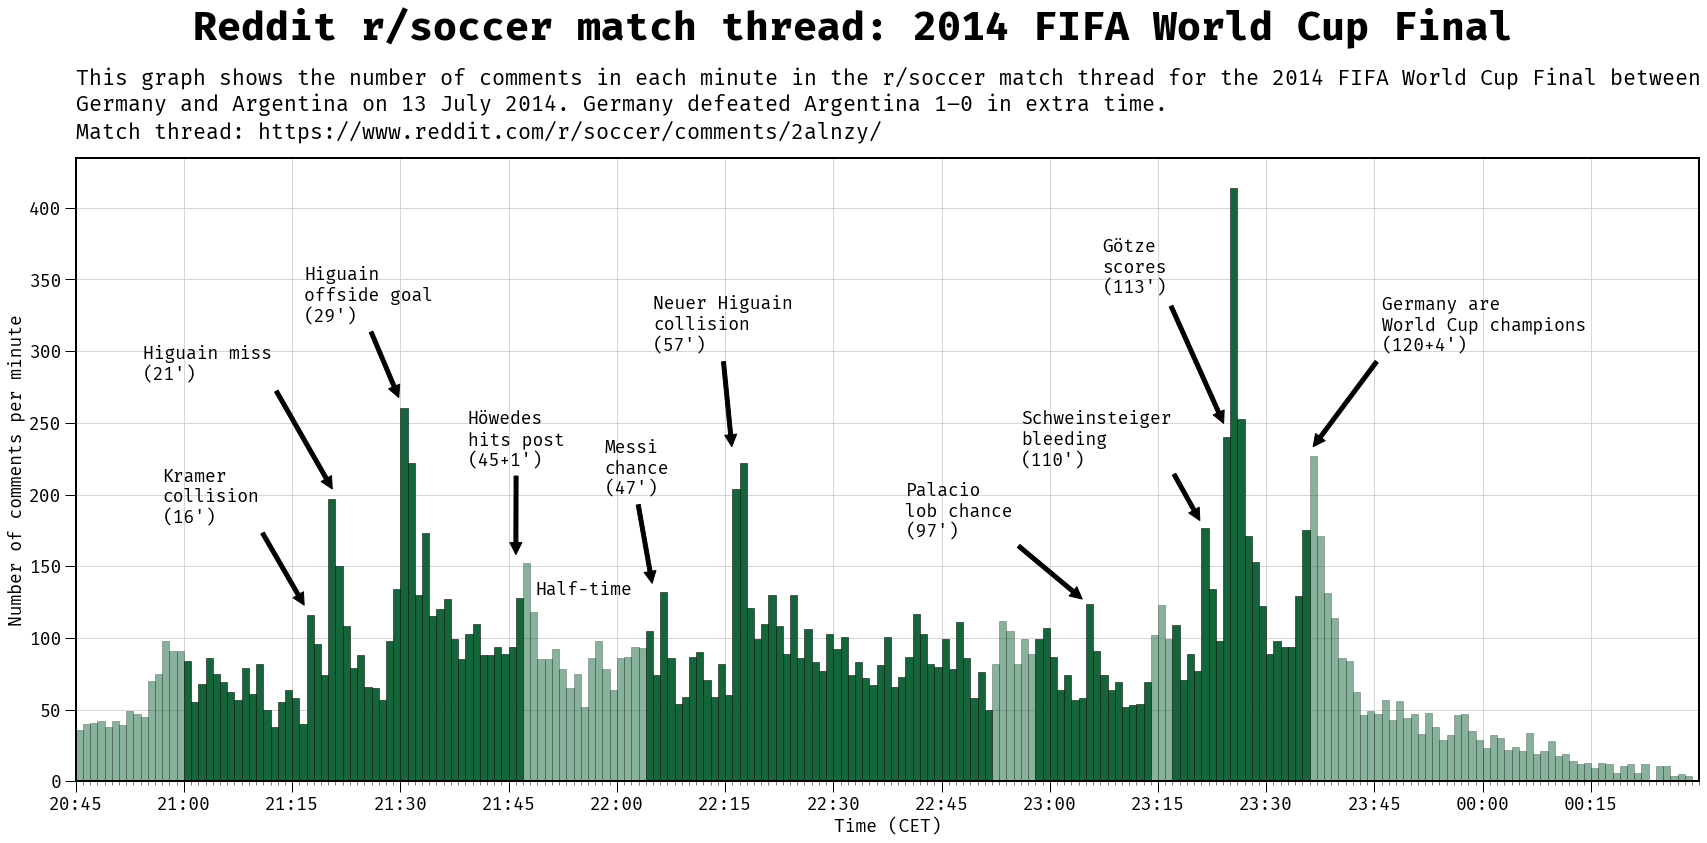

In [61]:
# Make histogram
fig, ax = plt.subplots(figsize=(24,12))
ax = (df["datetime"].view(int) / 10**9).hist(bins=bin_range, edgecolor='black', linewidth=0.5, color='#14663a', ax=ax)

# Color bins with different colors depending on the action
for patch in ax.patches:
    if (patch.xy[0] < game_start) or (patch.xy[0] >= extra_time_end) or \
       (patch.xy[0] >= game_break_start and patch.xy[0] < game_break_end) or \
       (patch.xy[0] >= game_end_90 and patch.xy[0] < extra_time_start) or \
       (patch.xy[0] >= extra_time_break_start and patch.xy[0] < extra_time_break_end):
        patch.set_alpha(0.5)
    #if patch.xy[0] == goal:
    #    patch.set_facecolor('r')

# Configure ticks
ax.set_xticks(x_ticks)
ax.tick_params('both', length=11, width=1, which='major')
ax.tick_params('both', length=4, width=0.5, which='minor')
ax.xaxis.set_minor_locator(minor_locator)
ax.set_xlim(min_bin, max_bin)

#ax.axvline(x=game_start, c='gray')

# Configure axis labels
labels = pd.to_datetime(ax.get_xticks().tolist(), unit='s').tz_localize('UTC').tz_convert('Europe/Berlin').strftime("%H:%M")
ax.set_xticklabels(labels)
ax.set_xlabel('Time (CET)')
ax.set_ylabel('Number of comments per minute')

# Create legend
#red_patch = Patch(color='red', label='Germany goal')
#handles = [red_patch]
#ax.legend(handles=handles, loc='upper right')

# Create text and title
ax.text(game_break_start+100, 130, 'Half-time', fontsize=18)

fig.suptitle('Reddit r/soccer match thread: 2014 FIFA World Cup Final', fontsize=40, fontweight='bold')
title = ax.set_title('This graph shows the number of comments in each minute in the r/soccer match thread for the 2014 FIFA World Cup Final between\nGermany and Argentina on 13 July 2014. Germany defeated Argentina 1–0 in extra time.\nMatch thread: https://www.reddit.com/r/soccer/comments/2alnzy/', loc='left', pad=20)

ax.annotate('Kramer\ncollision\n(16\')', xy=(kramer_collision, 120), xytext=(kramer_collision-1200, 180),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Higuain miss\n(21\')', xy=(higuain_miss, 200), xytext=(higuain_miss-1600, 280),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Higuain\noffside goal\n(29\')', xy=(higuain_offside_goal, 265), xytext=(higuain_offside_goal-800, 320),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Höwedes\nhits post\n(45+1\')', xy=(hoewedes_post, 155), xytext=(hoewedes_post-400, 220),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Messi\nchance\n(47\')', xy=(messi_chance, 135), xytext=(messi_chance-400, 200),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Neuer Higuain\ncollision\n(57\')', xy=(neuer_higuain_collision+60, 230), xytext=(neuer_higuain_collision-600, 300),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Palacio\nlob chance\n(97\')', xy=(palacio_lob_chance, 125), xytext=(palacio_lob_chance-1500, 170),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Schweinsteiger\nbleeding\n(110\')', xy=(schweinsteiger_bleeding, 180), xytext=(schweinsteiger_bleeding-1500, 220),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Götze\nscores\n(113\')', xy=(goetze_goal+30, 245), xytext=(goetze_goal-1000, 340),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Germany are\nWorld Cup champions\n(120+4\')', xy=(champions, 230), xytext=(champions+600, 300),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Draw plot
plt.tight_layout(pad=1.0)
fig.savefig('myplot.png')
plt.show()